In [140]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    base_price += learning_rate * (price - predicted_price)
    price_per_room += learning_rate * num_rooms * (price - predicted_price)
    return price_per_room, base_price
    

In [142]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    # if price - predicted_price is positive
    # then price_per_room a.k.a. the slope should be adjusted upwards by a little bit
    # also adjust base_price a.k.a. bias upwards
    if price > predicted_price:
        price_per_room += learning_rate * num_rooms
        base_price += learning_rate
    # if price - predicted_price is negative
    # adjust price_per_room and base_price downwards
    else:
        price_per_room -= learning_rate * num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [143]:
import random
import numpy as np

# Capture the changes in price_per_room
# and base_price in a list
price_per_room_base_price_list = []
root_mean_square_errors = []

def linear_regression(features, labels, learning_rate=0.01, epochs=100):
    def rmse(labels, predictions):
        n = len(labels)
        differences = np.subtract(labels, predictions)
        return np.sqrt(1.0 / n * (np.dot(differences, differences)))
    
    price_per_room = random.random()
    base_price = random.random()
    predictions = [0.0] * len(labels)
    for epoch in range(epochs):
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        
        predicted_price = base_price + price_per_room * num_rooms
        predictions[i] = predicted_price

        root_mean_square_errors.append(rmse(labels, predictions))

        base_price += learning_rate * (price - predicted_price)
        price_per_room += learning_rate * num_rooms * (price - predicted_price)
        price_per_room_base_price_list.append([price_per_room, base_price])

    return price_per_room, base_price

In [144]:
import numpy as np
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 448])

In [145]:
final_price_per_room, final_base_price = linear_regression(features, labels, learning_rate = 0.01, epochs=10000)

print(f'Final price {final_price_per_room:.2f} and Final base price {final_base_price:.2f}')
final_formula = lambda num_of_rooms : num_of_rooms * final_price_per_room + final_base_price
print(f'Apartments with 4 rooms approximately cost {final_formula(4):.2f}')

Final price 50.60 and Final base price 99.90
Apartments with 4 rooms approximately cost 302.32


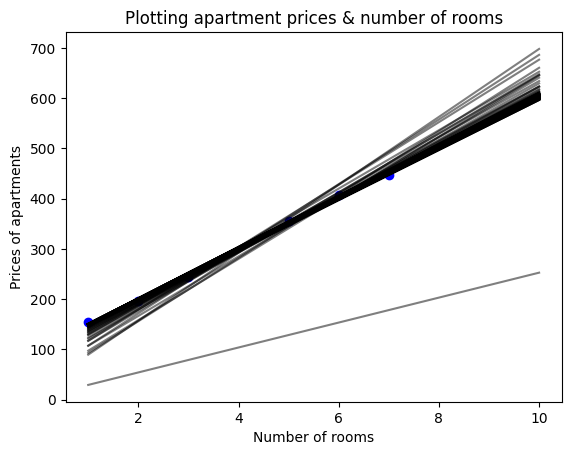

In [146]:
import matplotlib.pyplot as plt

# Plotting the prices of the apartments
plt.title("Plotting apartment prices & number of rooms")
plt.xlabel("Number of rooms")
plt.ylabel("Prices of apartments")
plt.scatter(features, labels, color = "blue")

index = 0
for price_per_room_and_base_price in price_per_room_base_price_list:
    price_per_room = price_per_room_and_base_price[0]
    base_price = price_per_room_and_base_price[1]
    m = price_per_room # slope
    b = base_price # y-intercept

    y = lambda x : m * x + b # linear function
    x = np.linspace(1, 10) # set of x values

    if index % 50 == 0:
        plt.plot(x, y(x), color = "black", alpha = 0.5)
    index += 1

plt.show()

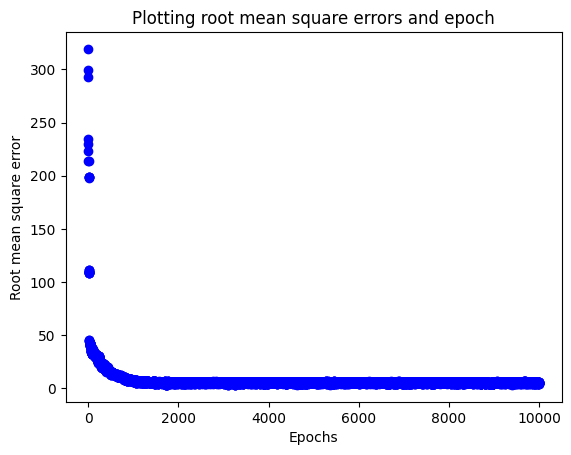

In [147]:
plt.title("Plotting root mean square errors and epoch")
plt.xlabel("Epochs")
plt.ylabel("Root mean square error")
epochs = range(10000)
plt.scatter(epochs, root_mean_square_errors, color = "blue")